<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4 Fraud Analysis

# Problem Statement

Nearly half of all Americans experienced some form of fraudulent charges in 2021, according to the security.org annual Fraud report. As society moves increasingly towards a cashless society every year, we must continue to advance our ability to detect fraud and protect consumers. Unfortunately, credit card fraud poses a significant challenge for classification algorithms as the classes are typically heavily imbalanced. For this project, we analyze simulated credit card fraud data and aim to build a model that can accurately detect fraud.

To do this our project will complete the following steps:
1) We clean the data, conduct exploratory data analysis, preprocess and engineer features for our regression model.
2) After testing several modeling strategies, we evaluate our model assumptions and choose an approach that will lead to the most accurate performance.
3) We present our findings to the business, highlighting our model's accuracy in predicting price and the features that will likely have the most negative impact on price. 

##### Imports for model

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

##### Read in the data

In [2]:
df_train = pd.read_csv('data/fraudTrain.csv')
df_test = pd.read_csv('data/fraudTest.csv')

# Data Cleaning

##### Data cleaning will consist of the following:
    1) visually inspecting the data and converting column names
    2) Checking and correcting missing data
    3) converting data to correct data types

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [87]:
df_train.shape

(1296675, 23)

In [85]:
len(pd.unique(df_train['cc_num']))

983

In [89]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_train.shape, df_test.shape

((1296675, 23), (555719, 23))

#### Verify columns are the same for train and test data

In [6]:
set(df_train.columns) - set(df_test.columns)

set()

#### Check for missing values

In [7]:
# check train nulls
df_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x> 0]

Series([], dtype: int64)

In [8]:
# check Test nulls
df_test.isnull().sum().sort_values(ascending = False).loc[lambda x: x>0]

Series([], dtype: int64)

In [9]:
df_train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

We adjust our transaction data time column to be in the proper form for subsquent analysis.

In [10]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Check data types

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

Our data types are the correct type at this point in our analysis. After conducting EDA, we may choose to tranform the data and will need to consider changing the data types of categorical variables.

# Exploratory Data Analysis

#### Our EDA section covers
    1) Examining summary statistics
    2) Outlier analysis
    3) Examining distributions to inform our modeling approach

In [14]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


In [15]:
df_train.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [16]:
df_train.is_fraud.value_counts(normalize=True).mul(100).round(2)

0    99.42
1     0.58
Name: is_fraud, dtype: float64

In [17]:
df_test.is_fraud.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [18]:
df_test.is_fraud.value_counts(normalize=True).mul(100).round(2)

0    99.61
1     0.39
Name: is_fraud, dtype: float64

#### We note highly imbalanced classes, which is a common challange of fraud detection problems.

<Figure size 1000x800 with 0 Axes>

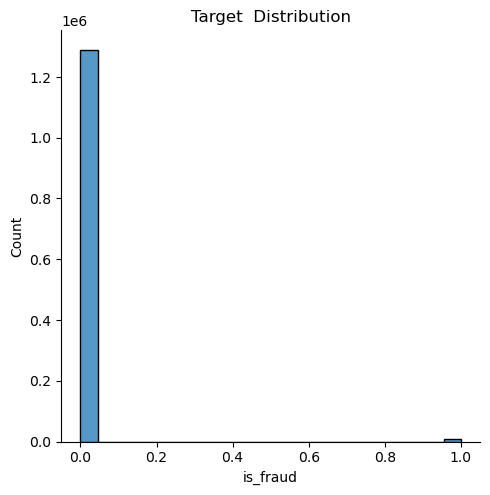

In [19]:
plt.figure(figsize=(10,8));
sns.displot(df_train['is_fraud']).set(title = 'Target  Distribution', 
                                                   xlabel='is_fraud', 
                                                   ylabel='Count');

## Drop duplicates

In [20]:
df_train.shape

(1296675, 23)

In [21]:
df_train.drop_duplicates(inplace=True)

In [22]:
df_train.shape

(1296675, 23)

### Examine box plots

In [23]:
num_cols = df_train.select_dtypes([np.int64,np.float64]).columns

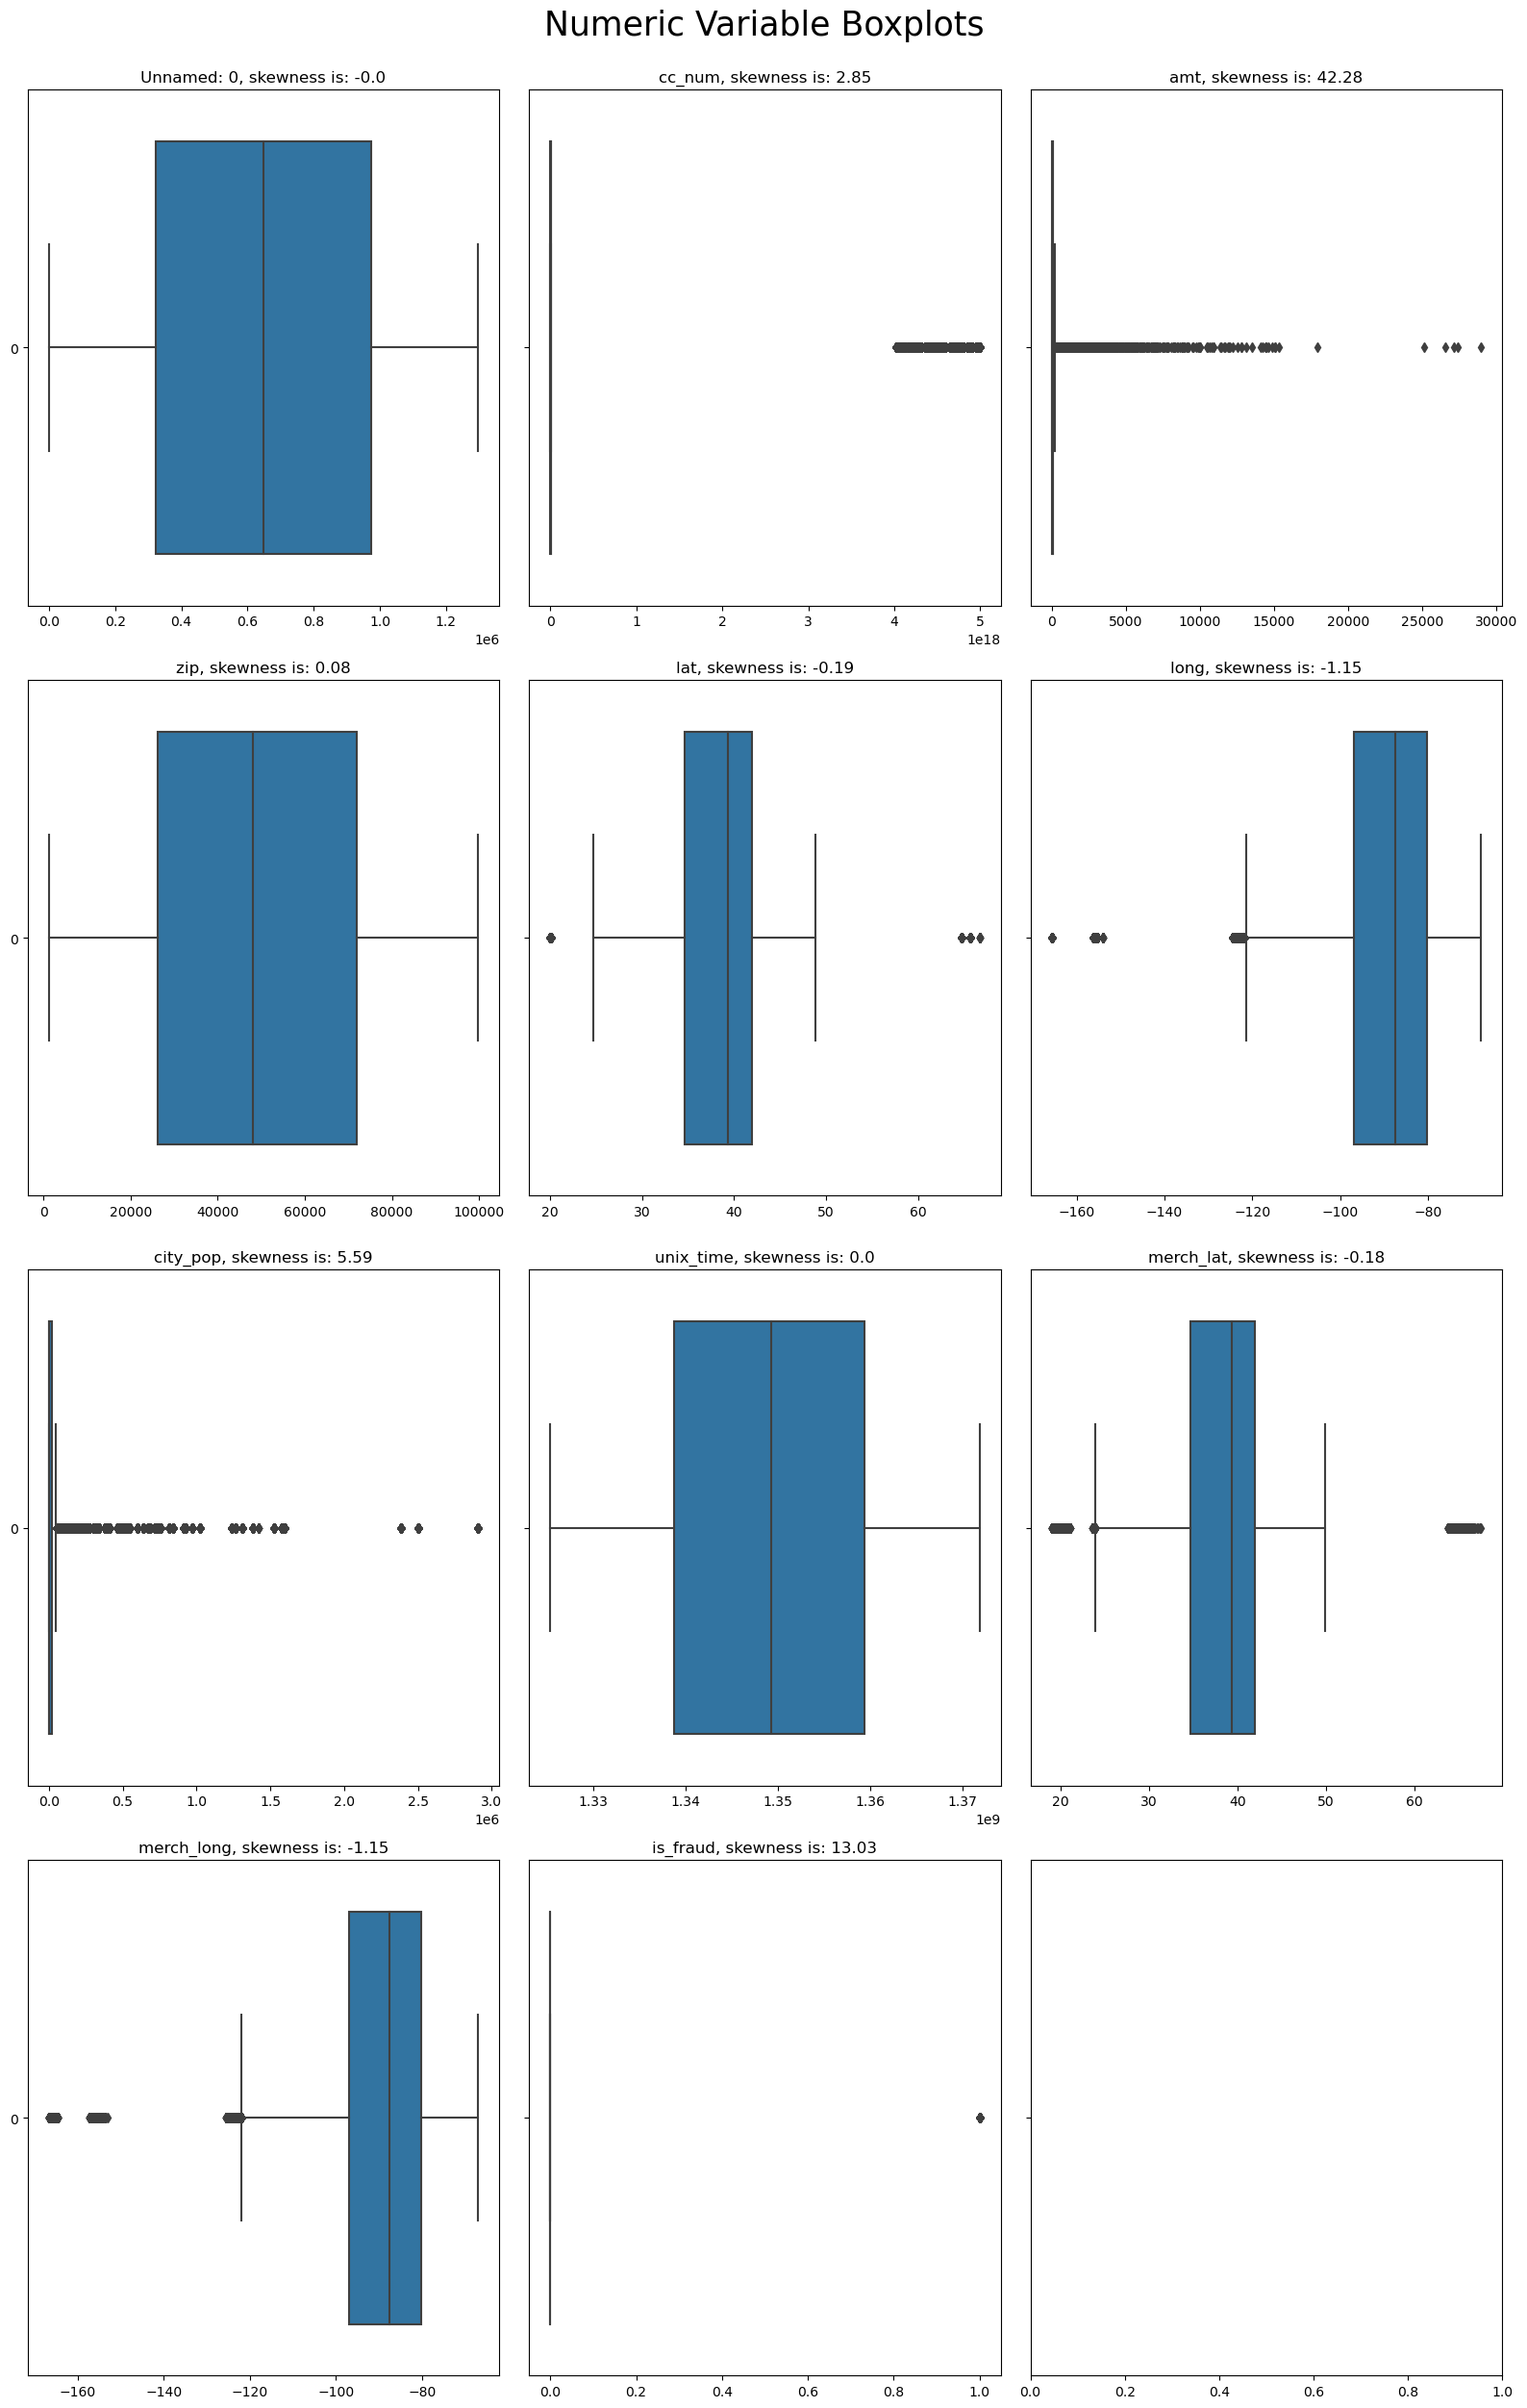

In [24]:
def get_boxplots(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
get_boxplots(dataset=df_train, columns_list=num_cols, rows=4, cols=3, suptitle='Numeric Variable Boxplots')
plt.tight_layout()

### Examine correlationss

In [25]:
df_train.corr()['is_fraud'].sort_values()

unix_time    -0.005078
Unnamed: 0   -0.004767
zip          -0.002162
cc_num       -0.000981
long          0.001721
merch_long    0.001721
merch_lat     0.001741
lat           0.001894
city_pop      0.002136
amt           0.219404
is_fraud      1.000000
Name: is_fraud, dtype: float64

<AxesSubplot:>

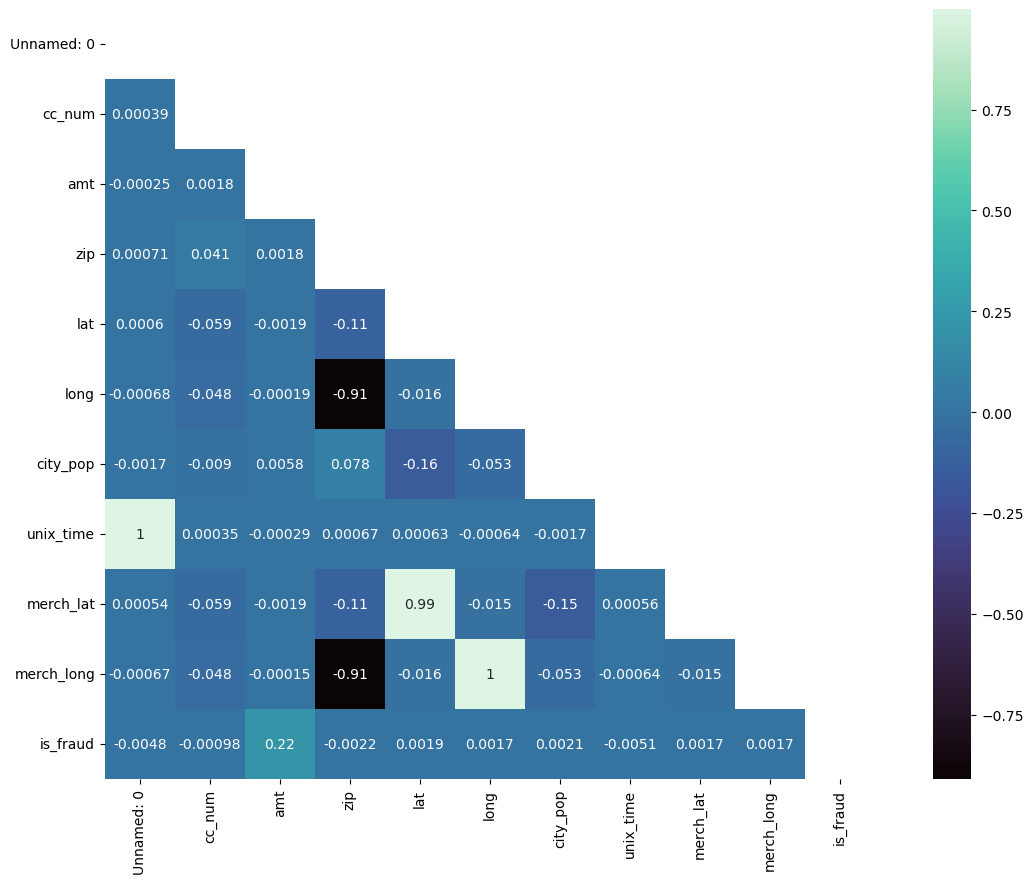

In [26]:
# Establish size of figure.
plt.figure(figsize=(15,10))

# Get correlation of variables.
corr = df_train.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, 
            square = True, annot = True,
           cmap = 'mako')

### Discuss heat map

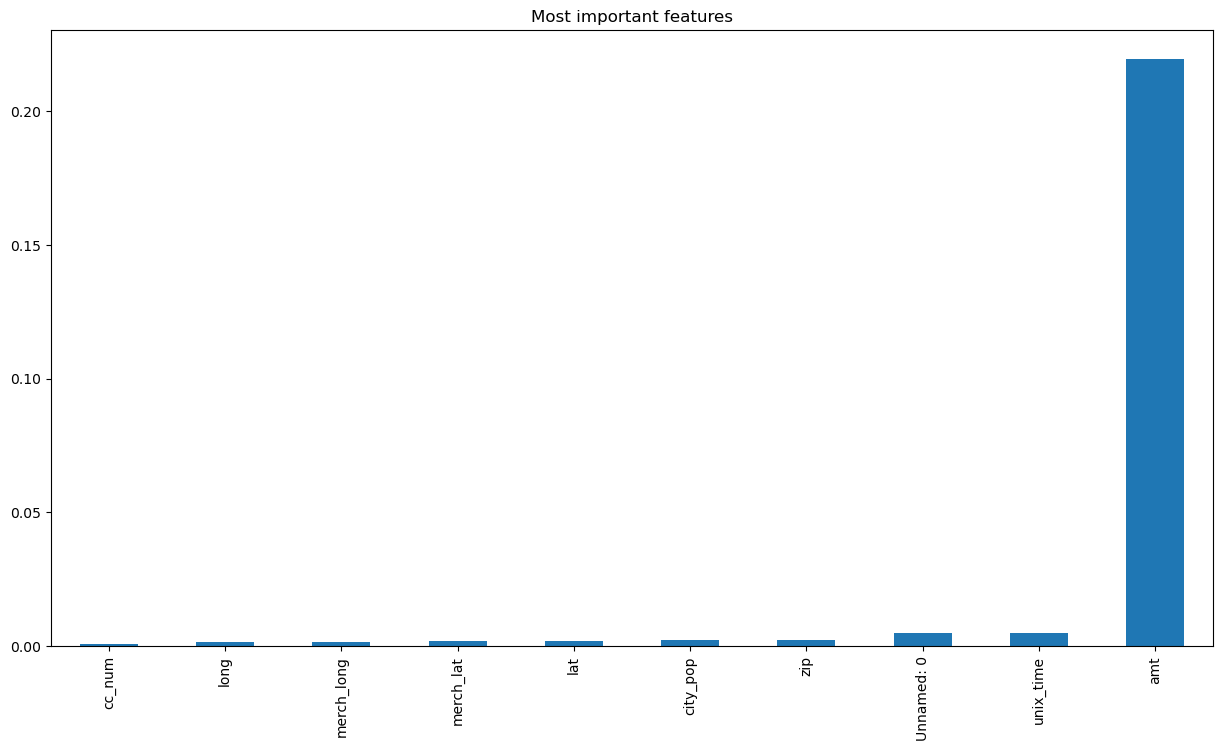

In [27]:
plt.figure(figsize=(15,8))
d = df_train.corr()['is_fraud'][:-1].abs().sort_values().plot(kind='bar',
                                                              title='Most important features')
plt.show()

### Feature distribution

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def distribution_plots(df, columns):
    n = len(columns)
    if n>11:
        print("Error: Number of columns exceeds limit of 9 columns")
        return
    rows, cols = np.int(np.ceil(n/3)), 3
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(13,8))
    for i, column in enumerate(columns):
        ax = axes.flat[i]
        ax.hist(df[column], bins=60, linewidth=0.5, edgecolor="white")
        ax.set_title(f"{column} distribution")
    plt.tight_layout()
    plt.show()


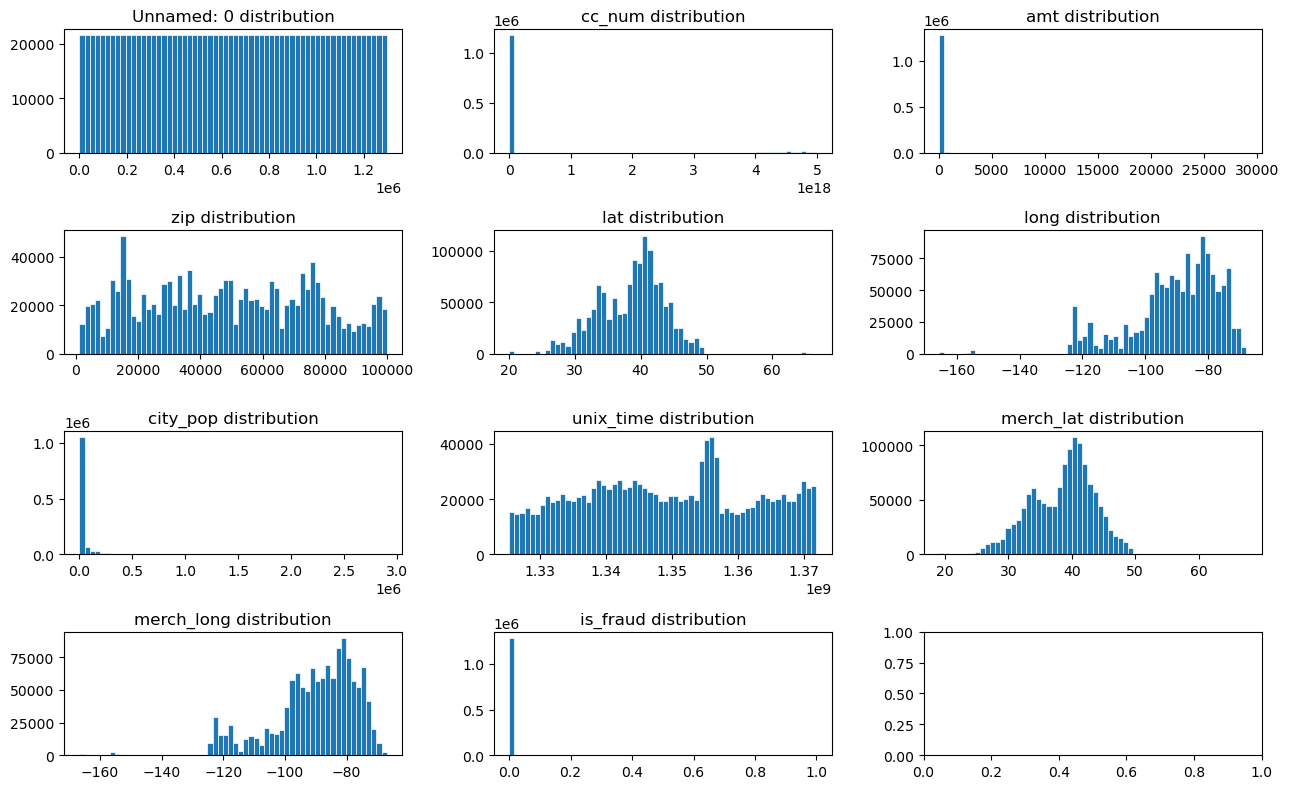

In [29]:
columns = list(df_train.columns)
distribution_plots(df_train, num_cols)

### Outlier analysis: TBD

In [30]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [31]:
# def find_outliers(df, columns):
#     outliers_count = 0
#     outlier_indices = []
#     for col in columns:
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - (1.5 * iqr)
#         upper_bound = q3 + (1.5 * iqr)
#         outlier_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#         outlier_indices.extend(outlier_col.index)
#         outliers_count += outlier_col.shape[0]
#     outlier_indices = list(set(outlier_indices))
#     return outliers_count, outlier_indices

# outliers_count, outlier_indices = find_outliers(df_train, num_cols)
# print(outliers_count)
# outliers_count/df_train.shape[0]

## Examine relationships of different featuers

In [32]:
def count_fraud_values(df, column):
    fraud_df = df[df['is_fraud'] == 1]
    value_counts = fraud_df[column].value_counts()
    return value_counts

In [33]:
count_fraud_values(df_train, 'gender')

M    3771
F    3735
Name: gender, dtype: int64

In [42]:
# def fraud_distribution(df, column):
#     """
#     Input dataframe and column of interest. The function returns distribution information 
#     the column of interest.
#     """
#     df_col = df[[column,'trans_num']].groupby([column]).count().reset_index()
#     df_col.columns = [column, column+'_count']

#     #creating the column-fraud distribution
#     df_fraud_col = df[[column, 'trans_num', 'is_fraud']].groupby([column,'is_fraud']).count().reset_index()
#     df_fraud_col.columns = [column, 'is_fraud', 'Transaction count']

#     df_fraud_col = df_fraud_col.merge(df_col[[column, column+'_count']], how='inner', on=column)

#     df_fraud_col['Transaction percentage'] = (df_fraud_col['Transaction count']/df_fraud_col[column+'_count'])*100

#     return df_fraud_col

# df_gender = df_train.groupby('gender')['trans_num'].agg('count').reset_index()
# df_gender.columns = ['gender', 'count']


# df_fraud_gender = df_train.groupby(['gender','is_fraud'])['trans_num'].agg('count').reset_index()
# df_fraud_gender.columns = ['gender', 'is_fraud', 'transaction_count']

# df_fraud_gender = df_fraud_gender.merge(df_gender[['gender', 'count']], how='inner', on='gender')

# df_fraud_gender['transaction_percent'] = (df_fraud_gender['transaction_count']/df_fraud_gender['count'])*100

In [78]:
def fraud_distribution_v3(df, column):
    """
    Input dataframe and column of interest. The function returns distribution information 
    the column of interest.
    """
    df_col = df[[column,'trans_num']].groupby([column]).agg({'trans_num':'count'}).reset_index()
    df_col.columns = [column, column+'_count']

    df_fraud_col = df[[column, 'trans_num',
                       'is_fraud']].groupby([column, 
                                             'is_fraud']).agg({'trans_num':'count'}).reset_index()
    df_fraud_col.columns = [column, 'is_fraud', 'transaction_count']
    df_fraud_col = df_fraud_col.merge(df_col, how='inner', on=column)
    df_fraud_col['transaction_percent'] = round(\
                                        (df_fraud_col['transaction_count']/df_fraud_col[column+'_count'])*100, 2)
    df_fraud_col = df_fraud_col.reindex(columns=[column,'transaction_count', column+'_count', 'transaction_percent', 'is_fraud'])
    return df_fraud_col

In [79]:
fraud_distribution_v3(df_train, 'gender')

,gender,transaction_count,gender_count,transaction_percent,is_fraud
0,F,706128,709863,99.47,0
1,F,3735,709863,0.53,1
2,M,583041,586812,99.36,0
3,M,3771,586812,0.64,1


We observe approximately the same number of fraud transaction for both genders. Hwoever, the proprtion of males commiting fraud is higher than females.

In [62]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [80]:
df_fraud_state = fraud_distribution_v3(df_train, 'state')
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,state,transaction_count,state_count,transaction_percent,is_fraud
16,DE,9,9,100.00,1
78,RI,15,550,2.73,1
1,AK,36,2120,1.70,1
66,NV,47,5607,0.84,1
11,CO,113,13880,0.81,1
84,TN,140,17554,0.80,1
74,OR,149,18597,0.80,1
58,NE,180,24168,0.74,1
42,ME,119,16505,0.72,1
60,NH,59,8278,0.71,1


Discussion here based on new data

In [81]:
df_fraud_category = fraud_distribution_v3(df_train, 'category')
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,category,transaction_count,category_count,transaction_percent,is_fraud
23,shopping_net,1713,97543,1.76,1
17,misc_net,915,63287,1.45,1
9,grocery_pos,1743,123638,1.41,1
25,shopping_pos,843,116672,0.72,1
5,gas_transport,618,131659,0.47,1
19,misc_pos,250,79655,0.31,1
7,grocery_net,134,45452,0.29,1
27,travel,116,40507,0.29,1
1,entertainment,233,94014,0.25,1
21,personal_care,220,90758,0.24,1


Discussion here based on new data

In [82]:
df_fraud_merchant = fraud_distribution_v3(df_train, 'merchant')
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,merchant,transaction_count,merchant_count,transaction_percent,is_fraud
672,fraud_Kozey-Boehm,48,1866,2.57,1
489,"fraud_Herman, Treutel and Dickens",33,1300,2.54,1
606,fraud_Kerluke-Abshire,41,1838,2.23,1
159,fraud_Brown PLC,26,1176,2.21,1
400,fraud_Goyette Inc,42,1943,2.16,1
1220,fraud_Terry-Huel,43,1996,2.15,1
562,fraud_Jast Ltd,42,1953,2.15,1
1100,"fraud_Schmeler, Bashirian and Price",41,1968,2.08,1
145,fraud_Boyer-Reichert,38,1908,1.99,1
742,"fraud_Langworth, Boehm and Gulgowski",39,1969,1.98,1


Discussion here based on new data

In [83]:
df_fraud_job = fraud_distribution_v3(df_train, 'job')
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by='transaction_percent',
                                                            ascending=False).head(10)

,job,transaction_count,job_count,transaction_percent,is_fraud
64,Armed forces technical officer,8,8,100.0,1
318,"Engineer, site",12,12,100.0,1
453,Information officer,8,8,100.0,1
493,Legal secretary,12,12,100.0,1
450,Industrial buyer,10,10,100.0,1
111,Careers adviser,15,15,100.0,1
421,Homeopath,11,11,100.0,1
94,Broadcast journalist,9,9,100.0,1
619,Personnel officer,12,12,100.0,1
374,Forest/woodland manager,9,9,100.0,1


Discussion here based on new data